In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('covid.sqlite')

In [4]:
# load the data into a Pandas DataFrame
df = pd.read_csv('owid-covid-data.csv')

# write the data to a sqlite table
df.to_sql('covid', conn, if_exists='replace', index = False)

In [5]:
all_columns = pd.read_sql_query('SELECT * FROM covid', conn,)
all_columns

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86413,ZWE,Africa,Zimbabwe,2021-05-02,38281.0,21.0,27.857,1570.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86414,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86415,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86416,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


# 1. How many countries are included in our data set?


In [6]:
nb_countries = pd.read_sql_query("""SELECT COUNT(DISTINCT location) 
                                    FROM covid
                                    WHERE location NOT IN ('Africa', 'Asia', 'South America', 'North America', 'Oceania',                                                                   'Europe', 'World', 'European Union')""", conn,)
nb_countries

,COUNT(DISTINCT location)
0,211


# 2. When was the most recent entry?

In [7]:
most_recent_entry = pd.read_sql_query("""SELECT * FROM covid 
                                        ORDER BY date DESC 
                                        LIMIT 1""", conn)
most_recent_entry

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2021-05-06,61162.0,365.0,226.571,2664.0,10.0,6.571,...,1803.987,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511


# 3. What country had the highest single day deaths per million? 


In [8]:
total_deaths_per_million = pd.read_sql_query("""SELECT location, total_deaths_per_million 
                                                FROM covid 
                                                ORDER BY total_deaths_per_million DESC 
                                                LIMIT 1""", conn,)
total_deaths_per_million

,location,total_deaths_per_million
0,Hungary,2929.19


# 4. Select any country. How many times have the deaths per million exceeded 1,000 in one day? 


In [9]:
deaths_more = pd.read_sql_query("""SELECT location,COUNT(new_deaths)
                                FROM covid 
                                WHERE location='France' 
                                AND new_deaths > 1000""", conn)
deaths_more

,location,COUNT(new_deaths)
0,France,12


# 5. Extract the deaths per million for US, France, and India. Plot the time series data and compare results to what the media is currently saying

In [10]:
deaths_countries = pd.read_sql_query("""SELECT location, MAX(total_deaths_per_million)
                                        FROM covid 
                                        WHERE location IN ('United States', 'France', 'India')
                                        GROUP BY location""", conn)
deaths_countries

,location,MAX(total_deaths_per_million)
0,France,1555.607
1,India,166.788
2,United States,1752.436


In [11]:
time_series_countries = pd.read_sql_query("""SELECT date, location, total_deaths_per_million
                                             FROM covid 
                                             WHERE location IN ('United States', 'France', 'India')
                                            """, conn)
time_series_countries

,date,location,total_deaths_per_million
0,2020-01-24,France,NaN
1,2020-01-25,France,NaN
2,2020-01-26,France,NaN
3,2020-01-27,France,NaN
4,2020-01-28,France,NaN
...,...,...,...
1398,2021-05-02,United States,1743.439
1399,2021-05-03,United States,1744.898
1400,2021-05-04,United States,1747.717
1401,2021-05-05,United States,1750.062


In [12]:
time_series_countries['date'] = pd.to_datetime(time_series_countries['date'])

<AxesSubplot:xlabel='date', ylabel='total_deaths_per_million'>

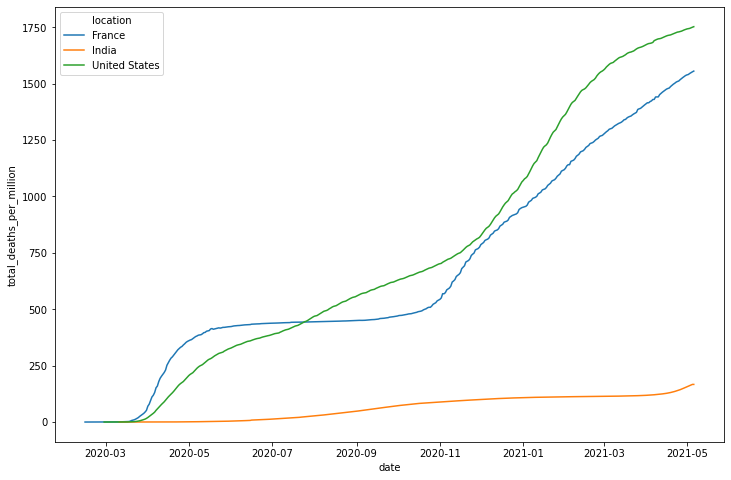

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(data=time_series_countries, x='date', y='total_deaths_per_million', hue='location')

# 6. Plot the deaths per million and cases per million by continent for your birthday in 2020. What does the data say?


In [14]:
deaths_cases = pd.read_sql_query("""SELECT date, continent, total_deaths_per_million, total_cases_per_million
                                    FROM covid 
                                    WHERE date = "2020-06-07"
                                    GROUP BY continent""", conn)
deaths_cases

,date,continent,total_deaths_per_million,total_cases_per_million
0,2020-06-07,None,3.870,141.392
1,2020-06-07,Africa,16.123,231.557
2,2020-06-07,Asia,9.273,522.627
3,2020-06-07,Europe,11.815,432.970
4,2020-06-07,North America,30.635,265.501
5,2020-06-07,Oceania,4.000,284.903
6,2020-06-07,South America,14.692,504.339


<AxesSubplot:xlabel='total_deaths_per_million', ylabel='total_cases_per_million'>

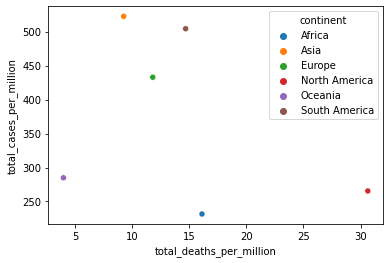

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=deaths_cases, x='total_deaths_per_million', y='total_cases_per_million', hue='continent')

# 7. Plot the lockdown stringency for each country and color the scatter points by continent. Any insights?

In [ ]:
stringency_world = pd.read_sql_query("""SELECT date, stringency_index, continent
                                    FROM covid""", conn)

In [17]:
stringency_world['date'] = stringency_world['date'].astype(dtype='datetime64[ns]')

<AxesSubplot:xlabel='date', ylabel='stringency_index'>

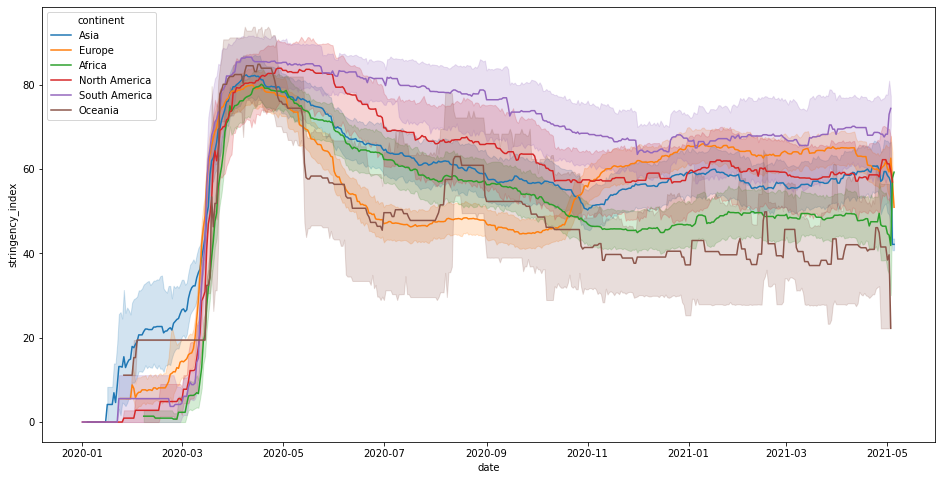

In [18]:
plt.figure(figsize=(16,8))
sns.lineplot(data=stringency_world, x='date', y='stringency_index', hue='continent')

In [22]:
stringency_france = pd.read_sql_query("""SELECT date,stringency_index, location
                                         FROM covid
                                            WHERE location='France'""", conn)

stringency_france

,date,stringency_index,location
0,2020-01-24,5.56,France
1,2020-01-25,5.56,France
2,2020-01-26,5.56,France
3,2020-01-27,5.56,France
4,2020-01-28,5.56,France
...,...,...,...
464,2021-05-02,75.00,France
465,2021-05-03,NaN,France
466,2021-05-04,NaN,France
467,2021-05-05,NaN,France


In [23]:
stringency_france['date'] = pd.to_datetime(stringency_france['date'])

<AxesSubplot:xlabel='date', ylabel='stringency_index'>

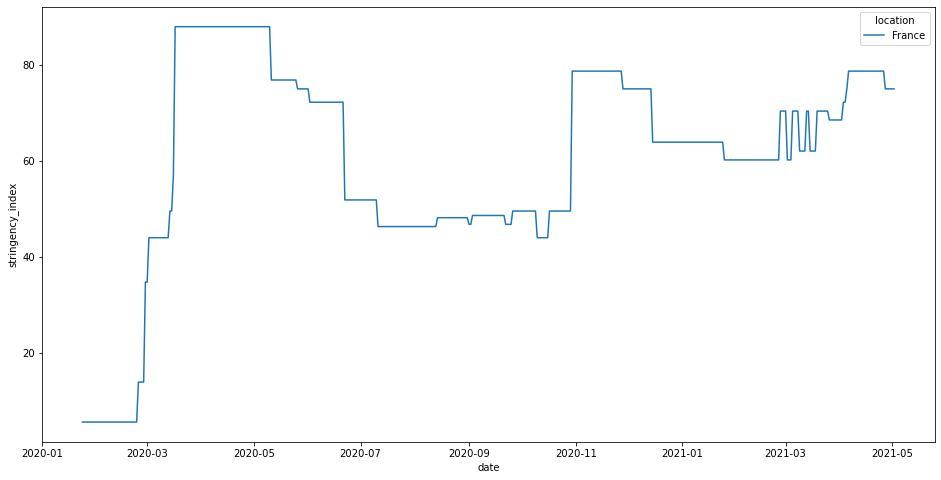

In [24]:
plt.figure(figsize=(16,8))
sns.lineplot(data=stringency_france, x='date', y='stringency_index', hue='location')